In [1]:
import os, re, glob
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import IFrame
from IPython.display import Image
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
 
%matplotlib inline

In [2]:
root = 'Covid'
recent_date = "01-31-2023"
previous_date = "01-01-2023"

duplicate_columns = {"Lat": "Latitude", 
                     "Long_": "Longitude",
                     "Incidence_Rate": "Incident_Rate",
                     "Case-Fatality_Ratio": "Case_Fatality_Ratio",
                     "Province/State": "Province_State",
                     "Country/Region": "Country_Region",
                     "Last Update": "Last_Update"}
 
recent_df = pd.read_csv(os.path.join(root, (recent_date + ".csv")))
previous_df = pd.read_csv(os.path.join(root, (previous_date + ".csv")))
 
for key, value in duplicate_columns.items(): 
    if key in recent_df.columns:
        recent_df = recent_df.rename(columns={key: value}) 
    if key in previous_df.columns:
        previous_df = previous_df.rename(columns={key: value})

In [3]:
recent_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2023-02-01 04:20:54,33.93911,67.709953,208545,7882,NaN,NaN,Afghanistan,535.715098,3.779520
1,NaN,NaN,NaN,Albania,2023-02-01 04:20:54,41.15330,20.168300,334167,3596,NaN,NaN,Albania,11611.891028,1.076109
2,NaN,NaN,NaN,Algeria,2023-02-01 04:20:54,28.03390,1.659600,271378,6881,NaN,NaN,Algeria,618.863273,2.535578
3,NaN,NaN,NaN,Andorra,2023-02-01 04:20:54,42.50630,1.521800,47839,165,NaN,NaN,Andorra,61915.485666,0.344907
4,NaN,NaN,NaN,Angola,2023-02-01 04:20:54,-11.20270,17.873900,105184,1931,NaN,NaN,Angola,320.036336,1.835831


In [4]:
previous_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2023-01-02 04:20:57,33.93911,67.709953,207616,7849,NaN,NaN,Afghanistan,533.328662,3.780537
1,NaN,NaN,NaN,Albania,2023-01-02 04:20:57,41.15330,20.168300,333811,3595,NaN,NaN,Albania,11599.520467,1.076957
2,NaN,NaN,NaN,Algeria,2023-01-02 04:20:57,28.03390,1.659600,271229,6881,NaN,NaN,Algeria,618.523486,2.536971
3,NaN,NaN,NaN,Andorra,2023-01-02 04:20:57,42.50630,1.521800,47751,165,NaN,NaN,Andorra,61801.591924,0.345543
4,NaN,NaN,NaN,Angola,2023-01-02 04:20:57,-11.20270,17.873900,105095,1930,NaN,NaN,Angola,319.765542,1.836434


In [5]:
current_df = pd.DataFrame(columns=['Province_State','Country_Region','Confirmed','Deaths'])
current_df['Province_State'] = recent_df['Province_State']
current_df['Country_Region'] = recent_df['Country_Region']
current_df['Confirmed'] = recent_df['Confirmed'] - previous_df['Confirmed'] 
current_df['Deaths'] = recent_df['Deaths'] - previous_df['Deaths'] 

In [6]:
current_df.shape

(4016, 4)

In [7]:
current_df.head()

,Province_State,Country_Region,Confirmed,Deaths
0,NaN,Afghanistan,929,33
1,NaN,Albania,356,1
2,NaN,Algeria,149,0
3,NaN,Andorra,88,0
4,NaN,Angola,89,1


In [8]:
name_number = 'ArabambiAkinyemi-2302546.csv'
current_df.to_csv(name_number, index=False)

In [9]:
data = pd.read_csv(name_number)

In [10]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths
0,NaN,Afghanistan,929,33
1,NaN,Albania,356,1
2,NaN,Algeria,149,0
3,NaN,Andorra,88,0
4,NaN,Angola,89,1


In [11]:
print(data.shape)

(4016, 4)


In [12]:
print(data.count())

Province_State    3837
Country_Region    4016
Confirmed         4016
Deaths            4016
dtype: int64


#  Q1. Print how many null values exist in the dataset.

In [13]:
print(data.apply(lambda x: sum(x.isnull()), axis=0))

Province_State    179
Country_Region      0
Confirmed           0
Deaths              0
dtype: int64


In [14]:
data.loc[data['Province_State'].isnull(),'Province_State'] = data['Country_Region']

In [15]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths
0,Afghanistan,Afghanistan,929,33
1,Albania,Albania,356,1
2,Algeria,Algeria,149,0
3,Andorra,Andorra,88,0
4,Angola,Angola,89,1


In [16]:
states = data['Province_State'].unique()
print("Number of unique States - ", len(states))

Number of unique States -  774


# Q2. Print how many unique countries exist in the dataset using a similar approach.

In [17]:
countries = data['Country_Region'].unique()
print("Number of unique Countries - ", len(countries))

Number of unique Countries -  201


In [18]:
import datetime, time, requests
from time import sleep
from geopy.geocoders import Nominatim
 
 
def get_lat_lon(place):
    geolocator = Nominatim(user_agent=name_number)
    location = geolocator.geocode(place)
    lat_lon = location.latitude, location.longitude
    
    output = [float(i) for i in lat_lon]
    return output


In [19]:
data['Province_State'].value_counts()

Texas          255
Georgia        162
Virginia       134
Kentucky       121
Missouri       117
              ... 
Maharashtra      1
Manipur          1
Meghalaya        1
Mizoram          1
Zimbabwe         1
Name: Province_State, Length: 774, dtype: int64

In [20]:
from tqdm import tqdm
 
geo_lat = []
geo_lon = []
 
not_found = []
found = []
for state in tqdm(states):
    time.sleep(0.2)
    lat_lon = [None, None]
    try:
        lat_lon = get_lat_lon(state)
        found.append(state)
    except:   
        not_found.append(state)
        
    geo_lat.append(lat_lon[0])
    geo_lon.append(lat_lon[1])
 
if len(not_found) > 0:
    print("Locations are not found for - ", not_found)
else:
    print("Found all the locations")
    
#if len(found) > 0:
#    print("Locations are found for - ", found)

100%|████████████████████████████████████████████████████████████████████████████████| 774/774 [06:27<00:00,  2.00it/s]

Locations are not found for -  ['Repatriated Travellers', 'W.P. Kuala Lumpur', 'Sakha (Yakutiya) Republic', 'Summer Olympics 2020']


In [21]:
states_list = states.tolist() #converting states to list to index list's items   
lats = []
lons = []
for i, r in data.iterrows():
    state = r['Province_State']
    index_list = states_list.index(state)
    lats.append(geo_lat[index_list])
    lons.append(geo_lon[index_list])
    
    
data['Latitude'] = lats
data['Longitude'] = lons

In [22]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
0,Afghanistan,Afghanistan,929,33,33.768006,66.238514
1,Albania,Albania,356,1,41.000028,19.999962
2,Algeria,Algeria,149,0,28.000027,2.999983
3,Andorra,Andorra,88,0,42.540717,1.573203
4,Angola,Angola,89,1,-11.877577,17.569124


In [23]:
if(lats != lats):
    print('Latitude from dataset and Latitude from geopy are not the same')
else:
    print('Same Latitude')

Same Latitude


In [24]:
if(lons != geo_lon):
    print('Latitude from dataset and Latitude from geopy are not the same')
else:
    print('Same Latitude')

Latitude from dataset and Latitude from geopy are not the same


In [25]:
#Selected rows without NaN
data = data[data['Latitude'].notna()]

In [26]:
data.shape

(4012, 6)

In [27]:
clustering_data = data[["Confirmed", "Deaths"]]

In [28]:
clustering_data.head(10)

,Confirmed,Deaths
0,929,33
1,356,1
2,149,0
3,88,0
4,89,1
5,0,0
6,0,0
7,145996,297
8,32,1
9,5918,14


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit(clustering_data).transform(clustering_data.astype(np.float))

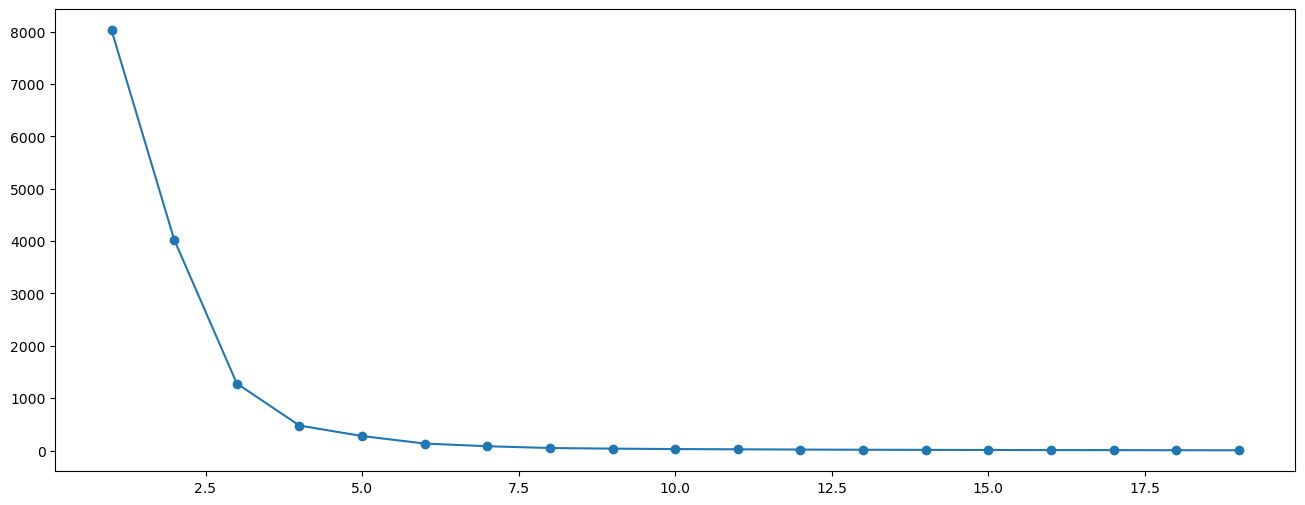

In [30]:
cluster_range = range( 1, 20 )
cluster_errors = []
 
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    cluster_errors.append( clusters.inertia_ )
 
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, 
                             "cluster_errors": cluster_errors } )
 
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [31]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(X_scaled)
 
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1
 
# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
clustering_data['cluster'] = cluster

In [32]:
clustering_data.head(10)

,Confirmed,Deaths,cluster
0,929,33,1
1,356,1,1
2,149,0,1
3,88,0,1
4,89,1,1
5,0,0,1
6,0,0,1
7,145996,297,4
8,32,1,1
9,5918,14,1


In [33]:
kmeans_mean_cluster = pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Confirmed,Deaths
cluster,,
1,1378.0,11.4
2,16.0,78917.0
3,861304.0,1124.5
4,160468.9,739.8


In [34]:
data['cluster'] = cluster
clusters = data[['Province_State', 'cluster']]
clusters.loc[clusters['cluster'] == 2]

,Province_State,cluster
142,Unknown,2


In [35]:
data['cluster'] = cluster
clusters = data[['Province_State', 'cluster']]
clusters.loc[clusters['cluster'] == 3]

,Province_State,cluster
368,"Korea, South",3
667,Taiwan*,3


# Q4. Discuss what do you think about other clusters?

In [36]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude,cluster
0,Afghanistan,Afghanistan,929,33,33.768006,66.238514,1
1,Albania,Albania,356,1,41.000028,19.999962,1
2,Algeria,Algeria,149,0,28.000027,2.999983,1
3,Andorra,Andorra,88,0,42.540717,1.573203,1
4,Angola,Angola,89,1,-11.877577,17.569124,1


In [37]:
def get_color(cluster_id):
    if cluster_id == 2:
        return 'darkred'
    if cluster_id == 1:
        return 'green'            
    if cluster_id == 3:
        return 'orange'
    if cluster_id == 4:
        return 'yellow'
    if cluster_id == 5:
        return 'blue'
    if cluster_id == 6:
        return 'black'
    
data["color"] = data["cluster"].apply(lambda x: get_color(x))

In [38]:
data.head(10)

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude,cluster,color
0,Afghanistan,Afghanistan,929,33,33.768006,66.238514,1,green
1,Albania,Albania,356,1,41.000028,19.999962,1,green
2,Algeria,Algeria,149,0,28.000027,2.999983,1,green
3,Andorra,Andorra,88,0,42.540717,1.573203,1,green
4,Angola,Angola,89,1,-11.877577,17.569124,1,green
5,Antarctica,Antarctica,0,0,-79.406307,0.314931,1,green
6,Antigua and Barbuda,Antigua and Barbuda,0,0,17.223472,-61.955461,1,green
7,Argentina,Argentina,145996,297,-34.996496,-64.967282,4,yellow
8,Armenia,Armenia,32,1,40.769627,44.673665,1,green
9,Australian Capital Territory,Australia,5918,14,-35.488350,149.002694,1,green


In [39]:
#create a map
this_map = folium.Map(location =[data["Latitude"].mean(), 
                                 data["Longitude"].mean()], zoom_start=5)
 
def plot_dot(point):    
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude],
                        radius=2, 
                        color=point.color,
                        weight=1).add_to(this_map)
    
    
 
 
#clustered_full.apply(,axis=1) #use this to iterate through every row in your dataframe
data.apply(plot_dot, axis = 1)
 
 
#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())
 
#Save the map to an HTML file
this_map.save(os.path.join('covid_map.html'))